In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [3]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

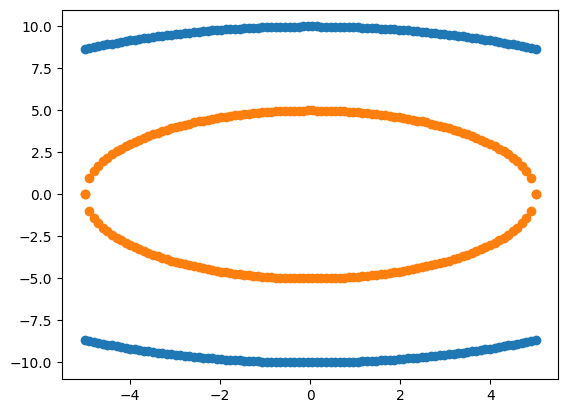

In [4]:
plt.scatter(x,y)
plt.scatter(x1,y1)

In [5]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df=pd.concat([df1,df2],ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [6]:
df['X1_sq']=df['X1']**2
df['X2_sq']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_sq,X2_sq,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['Y'],random_state=42,test_size=0.2)

In [8]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [9]:
fig=px.scatter_3d(df,x='X1_sq',y='X2_sq',z='X1*X2',color='Y')
fig.show()

In [10]:
from sklearn.svm import SVC
linear=SVC(kernel='linear')


In [11]:
linear.fit(x_train,y_train)
y_hat=linear.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

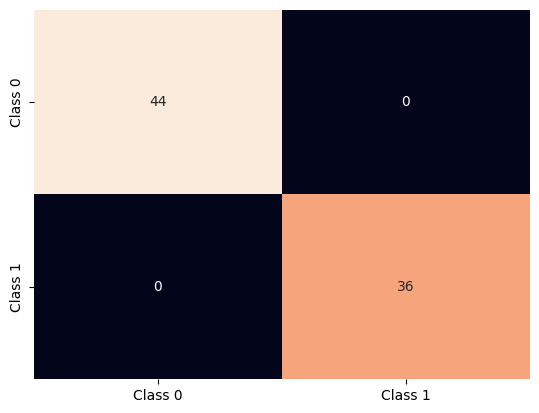

In [13]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

#### or you could have done

In [14]:
from sklearn.svm import SVC
poly=SVC(kernel='poly')
poly.fit(x_train,y_train)
y_hat1=poly.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_hat1)
cm=confusion_matrix(y_test,y_hat1)
report=classification_report(y_test,y_hat1)

Accuracty :1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

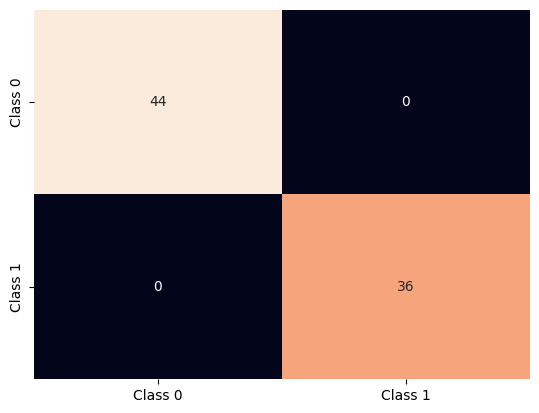

In [16]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

### using rbf kernel and only orignal points

In [17]:
from sklearn.svm import SVC
rbf=SVC(kernel='rbf')
rbf.fit(x_train[['X1','X2']],y_train)
y_hat2=rbf.predict(x_test[['X1','X2']])

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_hat2)
cm=confusion_matrix(y_test,y_hat2)
report=classification_report(y_test,y_hat2)

Accuracty :1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



<Axes: >

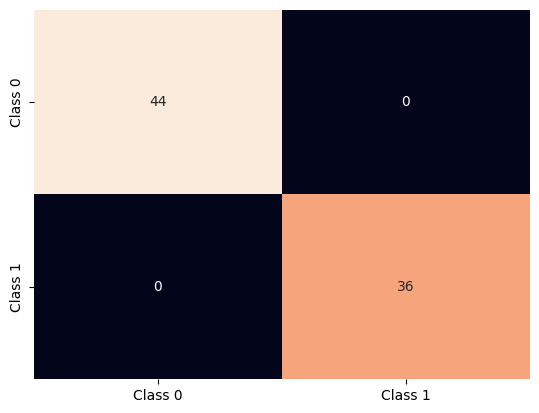

In [19]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)